# Plot Heart Rate

Change History
9/28/2021 Started
10/15/2021 Reviewed and tidied up for production use.
10/21/2021 Modified to use pandas resampling toolset instead of iso_date


In [45]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn
seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [46]:
heart_preprocessed = Path.cwd().parent / 'data' / 'processed' / 'heart_preprocessed.pickle'
heart_df_pickle = Path.cwd().parent / 'data' / 'processed' / 'heart_df.pickle'
heart_rate_d_pdf = Path.cwd().parent / 'reports' / 'heart_rate_d.pdf'
heart_rate_d_jpg = Path.cwd().parent / 'reports' / 'heart_rate_d.jpg'
heart_rate_w_pdf = Path.cwd().parent / 'reports' / 'heart_rate_w.pdf'
heart_rate_w_jpg = Path.cwd().parent / 'reports' / 'heart_rate_w.jpg'
heart_rate_ext_pdf = Path.cwd().parent / 'reports' / 'heart_rate_ext.pdf'
heart_rate_ext_jpg = Path.cwd().parent / 'reports' / 'heart_rate_ext.jpg'

### Get the raw data and analyse its structure

In [47]:
ds = pandas.read_pickle(heart_preprocessed)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174654 entries, 5 to 174658
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   value   174654 non-null  float64       
 1   type    174654 non-null  object        
 2   date    174654 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.3+ MB


In [48]:
ds.head()

,value,type,date
5,67.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:11:49
6,67.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:16:17
7,61.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:21:09
8,64.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:21:13
9,63.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:21:18


In [49]:
ds.tail()

,value,type,date
174654,73.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-28 21:10:00
174655,71.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-28 21:55:00
174656,73.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-28 21:59:00
174657,71.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-29 20:58:00
174658,76.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-30 00:16:00


### Select the heart rate records

In [50]:
heart_rate = ds['type'] == 'HKQuantityTypeIdentifierHeartRate'
ds = ds.loc[heart_rate, ['date', 'value']]
ds = ds.rename(columns={'value': 'heart rate'})
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174296 entries, 5 to 174300
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        174296 non-null  datetime64[ns]
 1   heart rate  174296 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB


In [51]:
ds.head()

,date,heart rate
5,2020-03-30 20:11:49,67.0
6,2020-03-30 20:16:17,67.0
7,2020-03-30 20:21:09,61.0
8,2020-03-30 20:21:13,64.0
9,2020-03-30 20:21:18,63.0


In [53]:
ds.to_pickle(heart_df_pickle)

## Group by varying periods using [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.resample.html?highlight=resample#pandas.core.groupby.DataFrameGroupBy.resample)
#### Create a DatetimeIndex

In [30]:
ds.head()

,date,heart rate
5,2020-03-30 20:11:49,67.0
6,2020-03-30 20:16:17,67.0
7,2020-03-30 20:21:09,61.0
8,2020-03-30 20:21:13,64.0
9,2020-03-30 20:21:18,63.0


In [31]:
ds = ds.set_index('date')
ds.head(5)

,heart rate
date,
2020-03-30 20:11:49,67.0
2020-03-30 20:16:17,67.0
2020-03-30 20:21:09,61.0
2020-03-30 20:21:13,64.0
2020-03-30 20:21:18,63.0


In [32]:
ds_day = ds.resample('D').mean()
ds_day.head()

,heart rate
date,
2020-03-30,70.657143
2020-03-31,68.996703
2020-04-01,71.148480
2020-04-02,68.063128
2020-04-03,71.284033


<AxesSubplot:xlabel='date'>

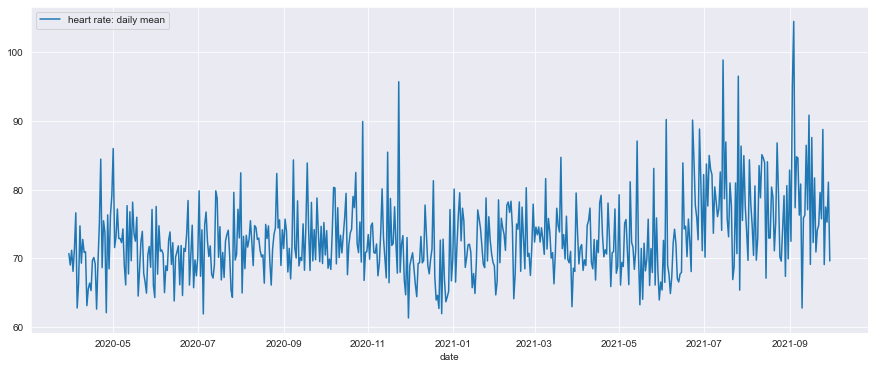

In [33]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.lineplot(data=ds_day, palette='tab10', linewidth=1.5, ax=axes_)
plot.legend(labels=['heart rate: daily mean'])
plot

In [34]:
fig.savefig(heart_rate_d_jpg)
fig.savefig(heart_rate_d_pdf)

In [35]:
ds_7day = ds.resample('7D').mean()
# ds_7day = ds.resample('7D').agg({'heart rate': ['mean', 'std']})
ds_7day.head()

,heart rate
date,
2020-03-30,69.852451
2020-04-06,69.887484
2020-04-13,66.925180
2020-04-20,72.947361
2020-04-27,75.605902


<AxesSubplot:xlabel='date'>

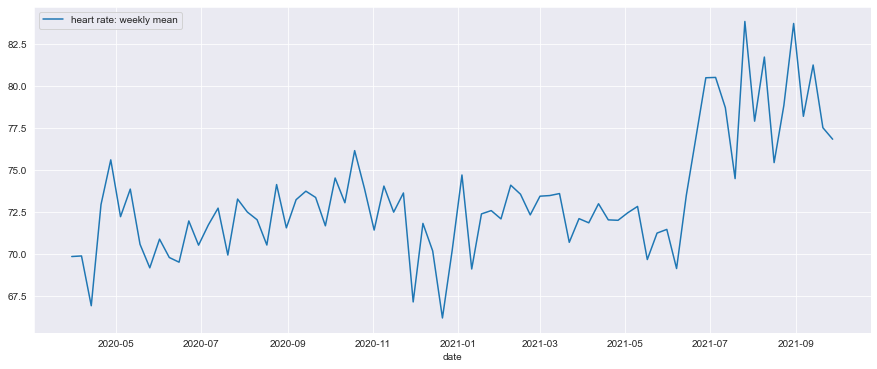

In [36]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.lineplot(data=ds_7day, palette='tab10', linewidth=1.5, ax=axes_)
plot.legend(labels=['heart rate: weekly mean'])
plot

In [37]:
fig.savefig(heart_rate_w_jpg)
fig.savefig(heart_rate_w_pdf)

### Extended Plot: Maximum,minimum, and standard deviation

In [38]:
ds_7ep = ds.resample('7D').agg({'heart rate': ['mean', 'median', 'std', 'max', 'min']})
ds_7ep.head()

heart rate                               
                 mean median        std    max   min
date                                                
2020-03-30  69.852451   68.0   9.965050  108.0  47.0
2020-04-06  69.887484   67.0  12.387731  121.0  48.0
2020-04-13  66.925180   65.0   9.766108  176.0  48.0
2020-04-20  72.947361   69.0  14.843103  180.0  46.0
2020-04-27  75.605902   73.0  13.078324  164.0  49.0

In [39]:
ds_7ep['heart rate'].head()

,mean,median,std,max,min
date,,,,,
2020-03-30,69.852451,68.0,9.965050,108.0,47.0
2020-04-06,69.887484,67.0,12.387731,121.0,48.0
2020-04-13,66.925180,65.0,9.766108,176.0,48.0
2020-04-20,72.947361,69.0,14.843103,180.0,46.0
2020-04-27,75.605902,73.0,13.078324,164.0,49.0


In [40]:
ds_7ep['heart rate']['std'].head()

date
2020-03-30     9.965050
2020-04-06    12.387731
2020-04-13     9.766108
2020-04-20    14.843103
2020-04-27    13.078324
Freq: 7D, Name: std, dtype: float64

In [41]:
ds_7ep["heart rate"].index

DatetimeIndex(['2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20',
               '2020-04-27', '2020-05-04', '2020-05-11', '2020-05-18',
               '2020-05-25', '2020-06-01', '2020-06-08', '2020-06-15',
               '2020-06-22', '2020-06-29', '2020-07-06', '2020-07-13',
               '2020-07-20', '2020-07-27', '2020-08-03', '2020-08-10',
               '2020-08-17', '2020-08-24', '2020-08-31', '2020-09-07',
               '2020-09-14', '2020-09-21', '2020-09-28', '2020-10-05',
               '2020-10-12', '2020-10-19', '2020-10-26', '2020-11-02',
               '2020-11-09', '2020-11-16', '2020-11-23', '2020-11-30',
               '2020-12-07', '2020-12-14', '2020-12-21', '2020-12-28',
               '2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
               '2021-02-01', '2021-02-08', '2021-02-15', '2021-02-22',
               '2021-03-01', '2021-03-08', '2021-03-15', '2021-03-22',
               '2021-03-29', '2021-04-05', '2021-04-12', '2021-04-19',
      

<AxesSubplot:xlabel='date'>

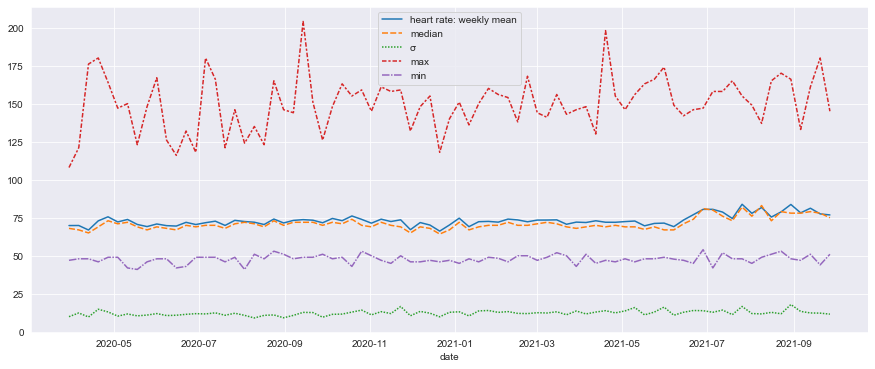

In [42]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.lineplot(data=ds_7ep['heart rate'])
plot.legend(labels=['heart rate: weekly mean', 'median', 'σ', 'max', 'min'])
plot

In [43]:
fig.savefig(heart_rate_ext_jpg)
fig.savefig(heart_rate_ext_pdf)

# TODO
Chart count of high values by time period. High values are >200, >=175 <200, >=150 <175, >=125 <150.
Time period is expected to be 7 days.